# **Synthetic Learning Behavior Analysis: Transform03**

## Objectives

* By the end of the transformation phase, I will:
    1. Encode and transform features.
    2. Run statistical tests and validate hypothesis.
    3. Visualize results and build a dashboard for communication.
    4. Build a model that is ready for real-world use.


## Inputs

* [Task outline](https://code-institute-org.github.io/5P-Assessments-Handbook/da-ai-bootcamp-capstone-prelims.html)
* Extract phase
* transform01 and transform02 notebooks
* personalized_learning_dataset_copy.csv 


## Outputs

* Transformed dataset
* Statistical tests that prove how features interact
* PowerBI Dashboard
* Logistic Regression and ML Model 

---

**Note:** This is a continuation of transformation02 file.

# Import key libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from feature_engine.encoding import OneHotEncoder
from sklearn.pipeline import Pipeline
import pingouin as pg #I need to install pingouin library to perform statistical tests.

# Data upload

In [3]:
df = pd.read_csv("../data/transformed_data/personalized_learning_dataset_transformed.csv")
df.head(5)

,Age,Education_Level,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Feedback_Score,Dropout_Likelihood,Gender_Female,Gender_Male,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Data Science,Course_Name_Web Development,Learning_Style_Visual,Learning_Style_Reading/Writing,Learning_Style_Kinesthetic
0,15,0,171,4,67,2,89,1,51,1,0,1,0,1,0,0,0,1,0,0
1,49,1,156,4,64,0,94,1,92,5,0,0,1,0,1,0,0,0,1,0
2,20,1,217,2,55,2,67,1,45,1,0,1,0,0,1,0,0,0,1,0
3,37,1,489,1,65,43,60,2,59,4,0,1,0,0,0,1,0,1,0,0
4,34,2,496,3,59,34,88,1,93,3,0,1,0,0,1,0,0,1,0,0


---

# Statistical tests

From the exrtact phase, we know that the synthetic dataset has features that are non-normally distributed. However, let me confirm that.

In [4]:
pg.normality(data = df.sample(n= 5000), alpha = 0.05) 
#Checking for normality in the sample data. AS the original dataset has 10,000 samples I am using a smaller sample for testing.

,W,pval,normal
Age,0.953419,3.185464e-37,False
Education_Level,0.803466,2.934769e-61,False
Time_Spent_on_Videos,0.953174,2.671855e-37,False
Quiz_Attempts,0.851258,3.987863e-56,False
Quiz_Scores,0.953913,4.549313e-37,False
Forum_Participation,0.956107,2.306039e-36,False
Assignment_Completion_Rate,0.951243,6.845702e-38,False
Engagement_Level,0.805397,4.501907e-61,False
Final_Exam_Score,0.955345,1.303194e-36,False
Feedback_Score,0.888441,4.548407e-51,False


The observation is in line with what I learnt from the Extract phase. None of the features are normally distributed.

## Statistical method: Justification

As all the features are non-normally distributed, I will require non-parametric tests. The actual test will depend on the hypotheses I am trying to prove.

Here are a couple of non-parameteic tests:
* Mann-Whitney U-Test
* Kruskal-Wallis Test

## Statistical method: Formulae credit

**Formulae credit:** For all the formulae used in this project, I leveraged the [LMS](https://learn.codeinstitute.net/courses/course-v1:CodeInstitute+FDAT+4/courseware/66f15aeacd89463daf460cf7429c28d2/a89a8ad7f7804985a1ba34907c97acc8/) to remind myself of the arguments and underlying principle.

**Note to the stakeholders:** The statistical tests used can be repurposed once real data is available. Depending on the data and its distribution, the variable names and/or test methods used may require modification.

---

# Business requirement #3: Engagement_Level

User story: As an instructional design manager, I want to understand what factors impact engagement levels so that I can drive my team to design user-friendly learning experiences.

**Hypohtheses:**

3.1. Time spent on videos is associated with engagement level

3.2. Learning style impacts engagment level

3.3. Forum participation impacts engagement level

3.4. Engagement level impact dropout likelihood

### 3.1. Time spent on videos is associated with engagement level

**Why this methodology:** Using Kruskal-Wallis test as Engagement_Level has three values (0, 1, and 2) to test the hypothesis.

**Null hypothesis:** The time learners spend on the videos has no statistical relationship with learners' engagement levels.

In [5]:
pg.kruskal(data = df, dv = "Time_Spent_on_Videos", between = "Engagement_Level")

,Source,ddof1,H,p-unc
Kruskal,Engagement_Level,2,6.578102,0.037289


**Explanation:**
The probability value (represented by p-unc) of 0.03 suggest that we indeed have enough evidence to reject the null hypothesis. In the synthetic dataset, time spent on videos and engagment level **are** statistically related. 

Visualizing the result

In [6]:
fig = px.box(data_frame= df,
       x = "Engagement_Level",
       y = "Time_Spent_on_Videos",
       color = "Engagement_Level",
       title = "Scatter Plot of Time Spent on Videos vs Engagement Level",
       labels = {"Time_Spent_on_Videos": "Time Spent on Videos (minutes)",
                 "Engagement_Level": "Engagement Level"
                 },
        width = 1000,
        height = 600
    )
fig.show() #Visualizing the relationship between Time_Spent_on_Videos and Engagement_Level using a scatter plot.
# I need to install nbformat

#I'm ignoring the FutureWarning for now.

c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


**Key observations:**
1. In the synthetic dataset, learners who display low engagement levels appear to spend slightly more number of minutes (median: 272) reviewing the video than those who display medium (median: 251) or high engagement levels(median: 257).

2. Learners who show low engagement levels appear to spend 15 minutes more than learners with high engagement level.

2. Although the p-value proves statistical correlation, that doesn't translate to practical relationship. The median levels of time spent reviewing videos are quite close to one another and the boxplot shows significant overlap.

3. Although p-value indicates that we have enough evidence to reject the null hypothesis, the visualization conveys there is no observable difference.

**Business recommendations:**
In the real world, when learners who show low engagement levels also spend a lot of time reviewing the videos, we would have to dig deep and understand the root cause. Here are some probable reasons:
1. Intnet bandwidth issues
2. Learners' previous knowledge
3. Lack of engagement and relatable examples
4. Cognitive overload: Clubbing too many topics
5. Distracted learners

We need to answer these questions to understand why learners with low engagement levels spend more time on videos. We could find answers through:
1. Learner survey
2. Qualitative review of the video
3. Qualitative feedback review (on the entire course)

### 3.2. Learning style impacts engagment level

**Why this methodology**: Chi-Squared Test can process object type categorical data. So, I will bring the dataset from the pre-transformation phase and conduct the statistical test on that.

Following OneHotEncoding, I won't be able to run statistical test on each dummy column that feature_engine might have included during transformation.

**Null hypothesis:** Learning style has no statistical relationship with the learners' engagement levels.

In [7]:
df_old = pd.read_csv("../data/copied_data/personalized_learning_dataset_copy.csv")
df_old.head(5)

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No


In [8]:
expected, observed, stats = pg.chi2_independence(data = df_old,
                                                 x = "Learning_Style",
                                                 y = "Engagement_Level")

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.775027,6.0,0.992727,0.006225,0.065671
1,cressie-read,0.666667,0.775182,6.0,0.992723,0.006226,0.065674
2,log-likelihood,0.000000,0.775502,6.0,0.992714,0.006227,0.065681
3,freeman-tukey,-0.500000,0.775749,6.0,0.992708,0.006228,0.065686
4,mod-log-likelihood,-1.000000,0.776002,6.0,0.992702,0.006229,0.065691
5,neyman,-2.000000,0.776528,6.0,0.992688,0.006231,0.065702


**Explanation:** A high p-value of almost 1 (0.99), suggets that there is no significant statistical relationship between learning style and engagement level in the synthetic dataset. 

We accept the null hypothesis. 

Visualizing the result

In [17]:
grouped_data = (df_old.groupby(["Learning_Style", "Engagement_Level"])
                .size().reset_index(name='Count'))

fig = px.bar(grouped_data,
             x = "Learning_Style",
             y = "Count",
             color = "Engagement_Level",
             barmode = "group",
             text= "Count",
             title = "Bar Plot of Learning Style vs Engagement Level")

fig.update_layout(
    xaxis_title = "Learning Style",
    yaxis_title = "Number of Learners",
    legend_title = "Engagement Level",
    bargap = 0.2)

fig.show() #Visualizing the relationship between Learning Style and Engagement Level using a bar plot.
#Ignoreing the FutureWarning.

c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Key observations:**
1. There almost an equal number of learners under each learning style who show high, medium, and low engagement levels.

2. The synthetic dataset we are using is void of real-world nuances.

3. Kinesthetic learners have the lowest number of learners (518) with a low engagement level, whereas auditory learners have the highest number of learners (528) with a low engagement level.

4. Learners who prefer reading/writing appear the most likey display a high engagement level (764 learners), while Auditory learners appear the least likely to display a high engagement level (729) learners.

**Business recommendations:** The synthetic dataset doesn't mirror nuances from the real world. However, learning style is known be one of most influential factors in determining learners' engagement.

Consider adding this to your data collection process, if not already done. This will help the business personalize learning recommendataions.

While there are many tests out there, not all organizations and employees will have the time to take such tests. Reviewing the content and ensuring that it addresses different kinds of learners is important. For instance, an entirely video-based course with no reading materials or discussion forums can be difficult for learners. Similarly, having only web-based reading content might be strenous too. A right balance of different formats will address multiple learning styles.

### 3.3. Forum participation impacts engagement level

**Why this methodology:** I am using Kruskal-Wallis Test as that allows testing multiple feature groups.

**Null hypothesis:** Forum participation has no statistical relationship with learners' engagement levels.

In [10]:
pg.kruskal(data = df, dv = "Forum_Participation", between = "Engagement_Level")

,Source,ddof1,H,p-unc
Kruskal,Engagement_Level,2,1.56304,0.45771


**Explanation:**  A p-unc score (p-value) of 0.4 is above the 0.05 accepted tolerance limit. The synthetic dataset shows no significant difference in forum participation across engagement levels. 

We do not have enough evidence to reject the null hypothesis and so, we accept it.

Visualizing the result

In [11]:
fig = px.box(data_frame= df,
       x = "Engagement_Level",
       y = "Forum_Participation",
       color = "Engagement_Level",
       title = "Scatter Plot of Forum Participation vs Engagement Level",
       labels = {"Forum_Participation": "Forum Participation (activity level)",
                 "Engagement_Level": "Engagement Level"
                 },
        width = 1000,
        height = 600
    )
fig.show()

c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Key observations:** 
1. The boxplot confirms the statistical test. The boxes from all three engagement levels have a significant overlap. 

2. The median for forum particiption too has no significant difference between the engagement levels (24 in high engagement and 25 in low and medium engagement groups).

**Business recommendations:** Although the synthetic dataset doesn't capture it, social learning is one of the key avenues through which learners can exchange insights and grow. While it is also not the easiest to measure, advanced tools make it easy to capture users' behaviors. 
I highly recommend that the business includes a social learning component (when absent), such as discussion forums, and use tools such as xAPI to track learning.

### 3.4. Engagement level impact dropout likelihood

**Why this methodology:** We are now comparing 2 categorical variables and one of them has a binary value. For such cases, we can use Chi_Squared Test.   

**Null hypothesis:** Engagement level has no statistical relationship with dropout likelihood.

In [12]:
expected, observed, stats = pg.chi2_independence(data = df, x = "Engagement_Level", y = "Dropout_Likelihood")

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,2.190711,2.0,0.334421,0.014801,0.243791
1,cressie-read,0.666667,2.198293,2.0,0.333155,0.014827,0.244518
2,log-likelihood,0.000000,2.213733,2.0,0.330593,0.014879,0.245999
3,freeman-tukey,-0.500000,2.225558,2.0,0.328644,0.014918,0.247133
4,mod-log-likelihood,-1.000000,2.237597,2.0,0.326672,0.014959,0.248288
5,neyman,-2.000000,2.262334,2.0,0.322656,0.015041,0.250663


**Explanation:** A high p-value score of 0.33 means that we do not have enough evidence to reject the null hypothesis. The synthetic dataset shows no statistical relationship between engagement level and dropout likelihood.

Visualizing the result

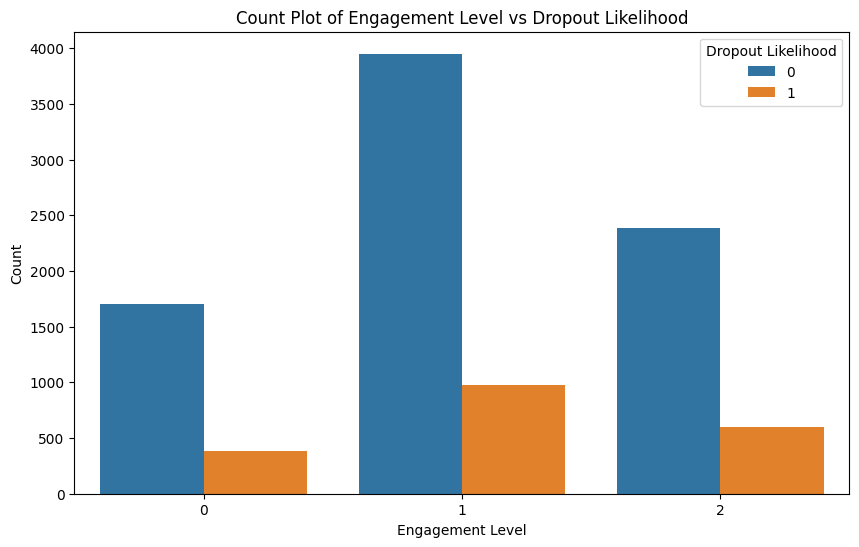

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x= "Engagement_Level", hue = "Dropout_Likelihood")
plt.title("Count Plot of Engagement Level vs Dropout Likelihood")
plt.xlabel("Engagement Level")
plt.ylabel("Count")
plt.legend(title="Dropout Likelihood")
plt.show()

**Key observations:**
1. Learners who are likely to drop out can be seen across all three engagement levels.

2. Learners who show low engagement levels appear least likely to dropout, while learners who show medium engagement levels appear most likely to dropout.

**Business recommendations:** In the real world, engagement levels are most likely to impact dropout scores. However, the synthetic dataset does not capture this relationship well. Monitoring how engaged learners are will be the easiest way to track rentention and improve performance.

If the engagement level is indeed low, then we need to understand the reason behind it. Here are some angles to probe:
1. Is the course appropriate for the audience?
2. Is the course engaging?
3. Why do the learners need this course?
4. Is the course challenging the learners enough?

Upon answering these questions, we can determine the course of action.

# Business requirement #4: Impact of course and learning style on engagement

**Hypotheses:**

4.1. Course choice impacts feedback

4.2. Course choice impacts learning style

## 4.1. Course choice impacts feedback

**Why this methodology**: Kruskal-Wallis too can process object type categorical data. So, using the dataset from the pre-transformation phase to test this hypothesis.

**Null Hypothesis:** Learners' choice of course has no statistical relationship with the feedback score.

In [14]:
pg.kruskal(data = df_old, dv = "Feedback_Score", between = "Course_Name")

,Source,ddof1,H,p-unc
Kruskal,Course_Name,4,2.709151,0.607614


**Explanation:** A p-unc of 0.6 suggests that there is not enough evidence to reject the null hypothesis. In the synthetic dataset, course choice and feedback do not share a statistically significant relationship.

Visualizing the result

In [18]:
fig = px.box(data_frame=df_old,
    x='Course_Name',
    y='Feedback_Score',
    color='Course_Name',
    title='Boxplot of Feedback Score by Course Name',
    labels={
        'Course_Name': 'Course Name',
        'Feedback_Score': 'Feedback Score'
    },
    width=1000,
    height=600
)
fig.show() # Visualizing the distribution of feedback scores for each course.

c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Key observations:** In accordance with other observations, the boxplot for feedback scores too are quite flat. The boxes and medians both overlap. There is no statistical correlation between the choice of course and the feedback scores.

**Business recommendation:** Although the synthetic dataset does not capture the relationship, feedback score can vary by courses in reality. Training sessions such as workplace behavior, security, and the likes may sound mundane but are critical for an individual and the organization's success. Measuring both quantitative (feedback scores) and qualitative (comments shared) feedback helps build a comprehensive picture.

When there are multiple courses, measuring and improving "hero" or top-selling courses can further the value provided and improve returns.

## 4.2. Course choice impacts learning style

**Why this methodology:** We are now comparing 2 categorical variables and Chi_Squared Test supports such tests.   

**Null Hypothesis:** Course choice has no statistical relationship with learning style.

In [15]:
expected, observed, stats = pg.chi2_independence(data = df_old, x = "Course_Name",
                                                 y = "Learning_Style")

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,8.711720,12.0,0.727336,0.017041,0.149255
1,cressie-read,0.666667,8.711969,12.0,0.727315,0.017041,0.149259
2,log-likelihood,0.000000,8.713356,12.0,0.727199,0.017042,0.149278
3,freeman-tukey,-0.500000,8.715175,12.0,0.727046,0.017044,0.149304
4,mod-log-likelihood,-1.000000,8.717661,12.0,0.726838,0.017047,0.149338
5,neyman,-2.000000,8.724632,12.0,0.726253,0.017053,0.149436


**Explanation:** A p-value of 0.7 doesn't offer enough evidence to reject the null hypothesis. The synthetic data shows no statitistically significant relationship between course choice and learning style.

Visualizing the result

In [19]:
grouped_data = (
    df_old.groupby(["Course_Name", "Learning_Style"])
    .size()
    .reset_index(name="Count")
)

fig = px.bar(
    grouped_data,
    x="Course_Name",
    y="Count",
    color="Learning_Style",
    barmode="group",
    text="Count",
    title="Bar Plot of Course Name vs Learning Style"
)
fig.update_layout(
    xaxis_title="Course Name",
    yaxis_title="Number of Learners",
    legend_title="Learning Style",
    bargap=0.2
)
fig.show()

c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Key observations:**
1. The distribution of learning styles appears relatively balanced across different courses, with no course showing a strong preference for a particular learning style.

2. Machine Learning courses show a marginally higher number of learners whose preferred learning style is reading and writing (540) followed by visual (530). These are the highest score for any learning style across different courses.

3. On the contrary, kinesthetic learners who have chosen Web Development are the lowest counts (471) across learning styles and courses.  

2. With real data, these nuances would have been more pronounced. For instance, visual learners could be higher on Web Development rather than on Cybersecurity (the inverse is true in the synthetic dataset).

**Business recommendations:** They synthetic dataset capture the real world variance, but on a tinier scale. Understanding the audience is the first step in designing a course. When you have visibility into who the actual users are and their preferred learning style, it opens up new avenues. For instance, following ChatGPT's introduction, people seem to be showing an increased interest in understanding AI. Knowing a new group's preference will help the business open avenues of growth.

In the synthetic dataset an understanding of how learners' learning style varies for a particular course, Machine Learning for instance, will guide the development team through the kind of updates they need to make in a continuous development cycle. Maybe the team can choose to provide coding challenges (that involve writing) or reading materials (such as research papers or blogs).

# Challenges

1. The nature of the synthetic dataset allows little room to create meaningful predictions.

2. Advanced hyperparameter tuning steps, especially for classifier algorithms.

3. Business recommendations cannot be generalized.

# Solutions

1. Contextualized even marginal differences and explained why the business should watch out for such signals.

2. Utilized ChatGPT and the LMS to understand key steps.

---

# Ethical considerations

1. Restricted explanation to synthetic dataset and avoided generalizations.
2. Business recommendations capture nuances such as why certain features matter and how to handle problems when they occur.

# Summary 

1. The transformation phase uses both manual and automated encoding to ensure features are represented in a way that supports robust analysis and modeling.

2. Statistical tests reveal that most relationships between features are weak or non-existent, highlighting the limitations of synthetic data for uncovering real-world patterns.

3. Visualizations consistently show overlapping distributions and flat correlations, reinforcing the absence of strong, actionable insights in the engineered dataset.

4. Despite the lack of practical relationships, the transformation process builds a foundation for future analysis and model development when real data becomes available.

5. Business recommendations and next steps should be guided by real-world validation, as synthetic data can only provide a framework—not definitive answers.

**Summary generation credit:** Leveraged GitHub Copilot to generate the summary.